In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("D:/JupyterNotebooks/Ads_data.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64

In [6]:
#The “Clicked on Ad” column contains 0 and 1 values, where 0 means not clicked, and 1 means clicked. I’ll transform these values into “yes” and “no”:

In [7]:
data['Clicked on Ad'] = data['Clicked on Ad'].map({0:'No',1:'Yes'})
data['Clicked on Ad'].value_counts()

Clicked on Ad
No     5083
Yes    4917
Name: count, dtype: int64

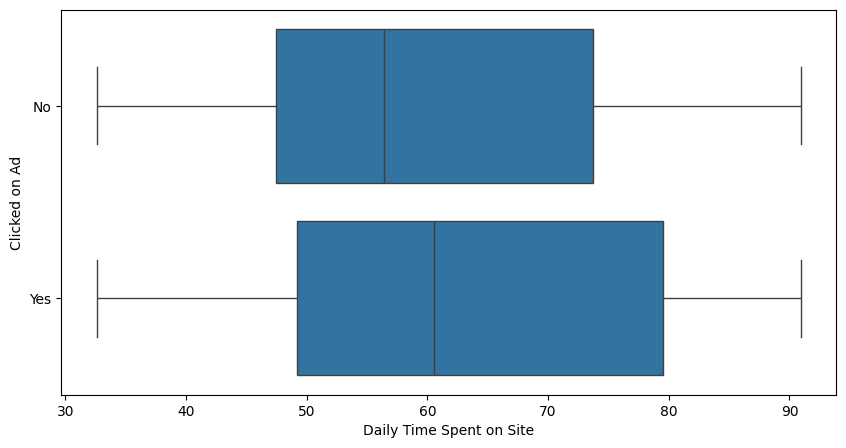

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,y='Clicked on Ad',x='Daily Time Spent on Site')
plt.show()

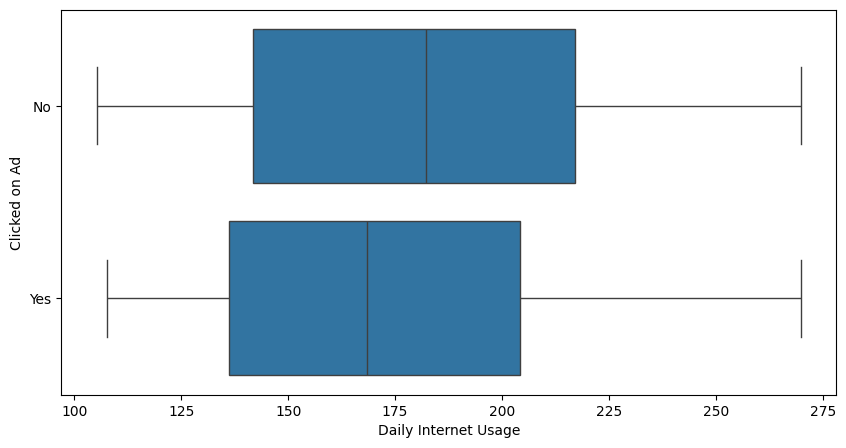

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,y='Clicked on Ad',x='Daily Internet Usage')
plt.show()

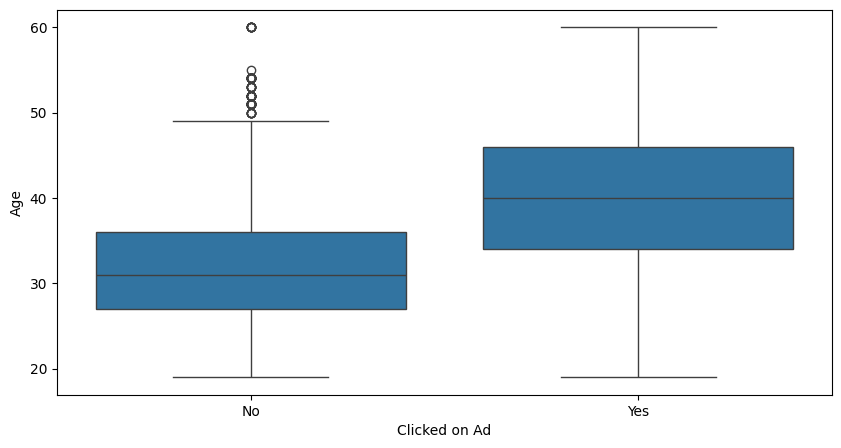

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Clicked on Ad',y='Age')
plt.show()

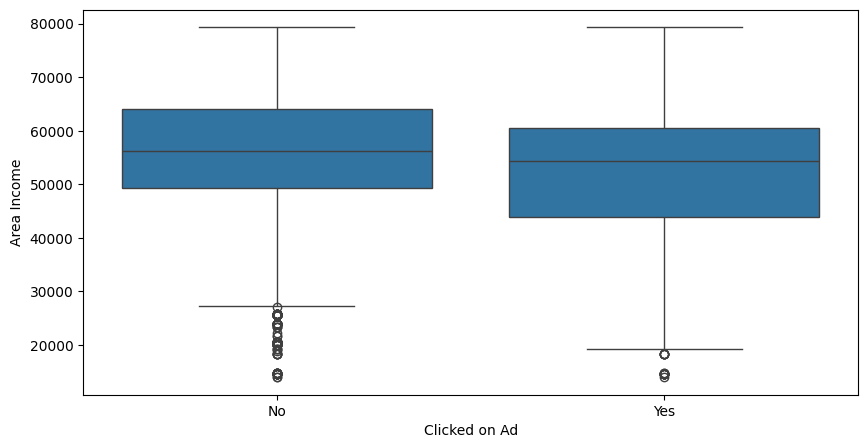

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Clicked on Ad',y='Area Income')
plt.show()

In [16]:
click_through_rate = 4917 / 10000 * 100
print(click_through_rate)

49.17


In [17]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

In [19]:
x=data.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=data.iloc[:,9]

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [25]:
y_pred = model.predict(xtest)

In [26]:
print(accuracy_score(ytest,y_pred))

0.959


In [27]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

Ads Click Through Rate Prediction : 


Daily Time Spent on Site:  62.26
Age:  28
Area Income:  61840.26
Daily Internet Usage:  207.17
Gender (Male = 1, Female = 0) :  0


In [28]:
features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", model.predict(features))

Will the user click on ad =  ['No']


D:\Anaconda\envs\ML-Env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
